<a href="https://colab.research.google.com/github/noamya-sh/final-project/blob/main/Cardiovascular_Disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cardiovascular disease

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score,recall_score,precision_score,plot_roc_curve,plot_precision_recall_curve

%matplotlib inline

In [163]:
url='https://raw.githubusercontent.com/noamya-sh/final-project/main/cardio_train.csv'
data=pd.read_csv(url,sep=";")



#### There are 3 types of input features:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.<br><br>
 #### Features:<br>
- Age | Objective Feature | age | int (days)<br>
- Height | Objective Feature | height | int (cm) |<br>
- Weight | Objective Feature | weight | float (kg) |<br>
- Gender | Objective Feature | gender | categorical code |<br>
- Systolic blood pressure | Examination Feature | ap_hi | int |<br>
- Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
- Smoking | Subjective Feature | smoke | binary |<br>
- Alcohol intake | Subjective Feature | alco | binary |<br>
- Physical activity | Subjective Feature | active | binary |<br>
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br><br>
All of the dataset values were collected at the moment of medical examination.<br></font></span></left>

In [164]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


As you can see there are no null values in the data frame. Delete the 'id' feature that does not provide important information.

In [166]:
data=data.drop(columns='id')

Show the data distribution in the different categories:

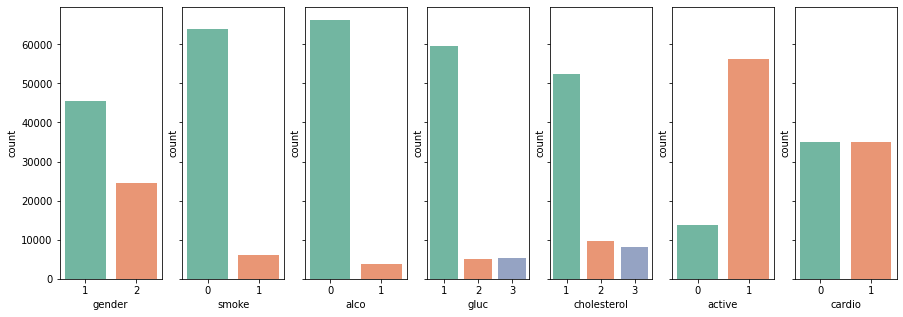

In [167]:
f, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gender',data=data,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=data,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=data,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=data,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=data,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=data,ax=axes[5],palette="Set2")
sns.countplot(x='cardio',data=data,ax=axes[6],palette="Set2")

The 'Age' feature counts age by days. Convert it to age by years.

In [168]:
data['age']=data['age']/365
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [169]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The data show that the ages of the sampled are between 30-65.

There are many entries that need to be cleared or corrected in the data. Unreasonable blood pressure values can be seen, as well as height and weight values.

In [170]:
data.duplicated().sum()

24

In [171]:
data.drop_duplicates(inplace=True) #delete duplicates values.

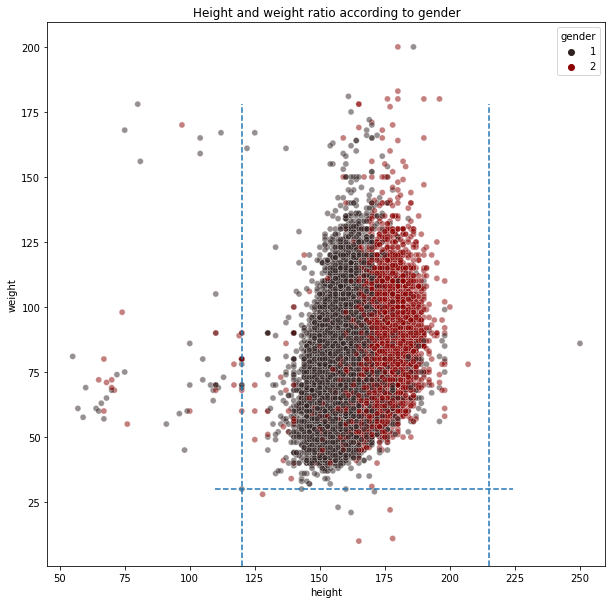

In [172]:
#plot relation height-weight by gender
f, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data=data, x="height", y="weight",hue='gender',palette="dark:darkred", alpha=0.5)
ax.axvline(120, ls='--',ymax=0.85)
ax.axvline(215, ls='--',ymax=0.85)
ax.axhline(30, ls='--',xmin=0.3,xmax=0.835)
plt.title("Height and weight ratio according to gender")
plt.show()

Delete unreasonable height and weight data.

In [173]:
data=data.query('height >= 120 & height <=215 & weight >= 30')

We will add to the data feature 'bmi' according to the following formula:

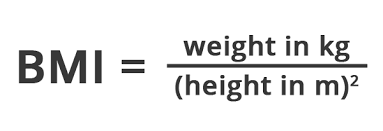

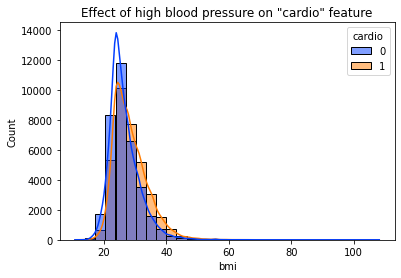

In [174]:
data['bmi'] = data['weight']/((data['height']/100)**2)
sns.histplot(data=data,x='bmi',hue='cardio',kde=True,bins=30,palette='bright')
plt.title('Effect of high blood pressure on "cardio" feature')
plt.show()

You can see that there is a higher incidence of heart disease among 'bmi' higher.
Delete unreasonable values:

In [175]:
data=data.query('bmi <= 50')


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57.736986,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


The following are blood pressure indicators:

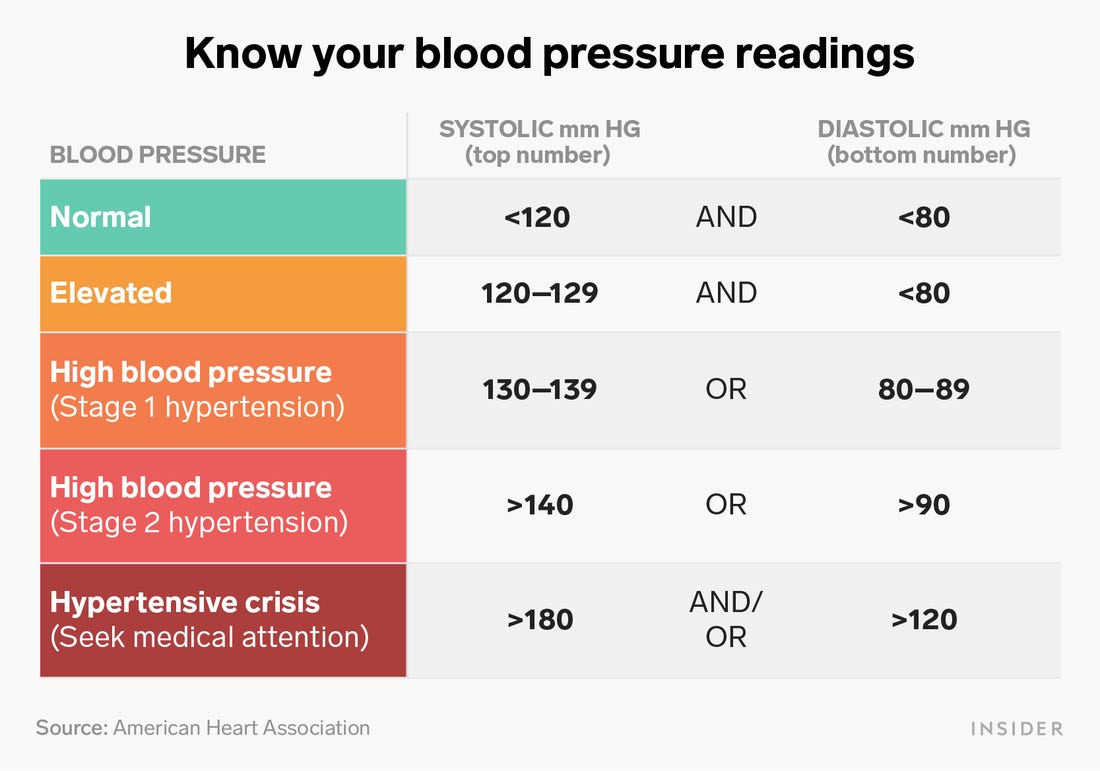

Delete unreasonable values (diastolic higher than systolic, numbers out of measurement range):

In [176]:
data=data.query('70 < ap_hi < 240 & 40 < ap_lo < 180 & ap_hi> ap_lo')

Create 'pressure' feature that rates each person by their blood pressure level:

In [177]:
# for index,row in data.iterrows():
#     pre=0
#     if (row['ap_hi']<120 and row['ap_lo']<80):
#             pre=1
#     if (120<=row['ap_hi']<130 and row['ap_lo']<80):
#             pre=2
#     if ((130<=row['ap_hi']<140) or (80<=row['ap_lo']<90)):
#             pre=3
#     if ((140<=row['ap_hi']<180) or (90<=row['ap_lo']<120)):
#             pre=4
#     if (row['ap_hi']>=180 or row['ap_lo']>=120):
#             pre=5
#     data.at[index,'pressure']=pre
# # sns.countplot(x='gender',data=data,ax=axes[0],palette="Set2")
# # sns.countplot(x='smoke',data=data,ax=axes[1],palette="Set2")
# # sns.countplot(x='alco',data=data,ax=axes[2],palette="Set2")
# # sns.countplot(x='gluc',data=data,ax=axes[3],palette="Set2")
# # sns.countplot(x='cholesterol',data=data,ax=axes[4],palette="Set2")

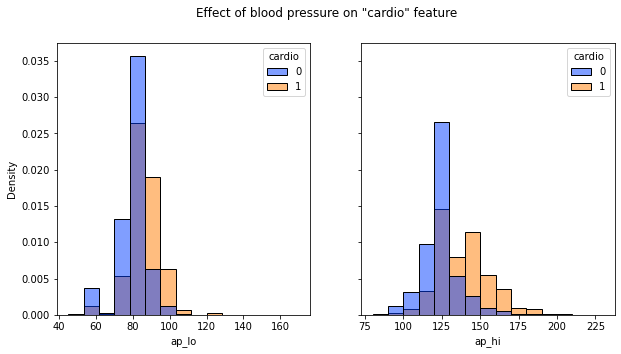

In [221]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False,sharey=True)
sns.histplot(data, x="ap_hi", hue="cardio",bins=15,palette='bright',stat="density",ax=axes[1])
sns.histplot(data, x="ap_lo", hue="cardio",bins=15,palette='bright',stat="density",ax=axes[0])
f.suptitle('Effect of blood pressure on "cardio" feature')
plt.show()

Now we will see the correlation between the different features:

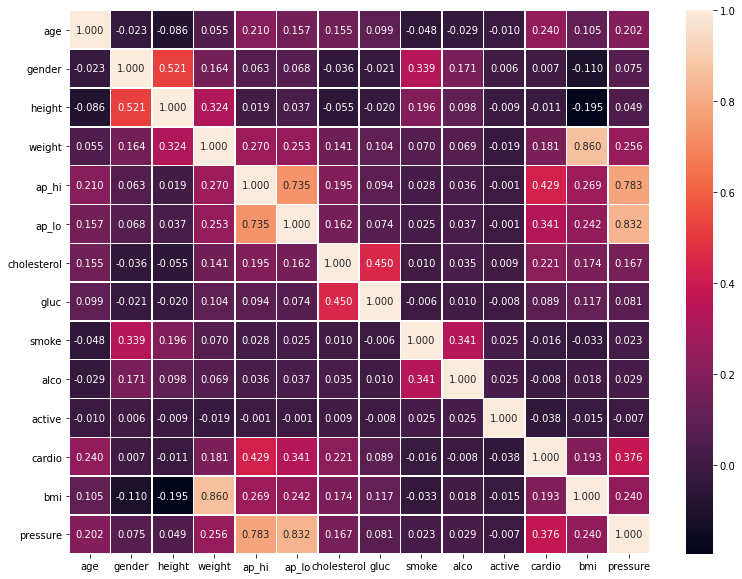

In [179]:
corr = data.corr()
f, ax = plt.subplots(figsize = (13,10))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

It can be seen that the factors that mainly affect the 'cardio' feature are: blood pressure, cholesterol, age and bmi.

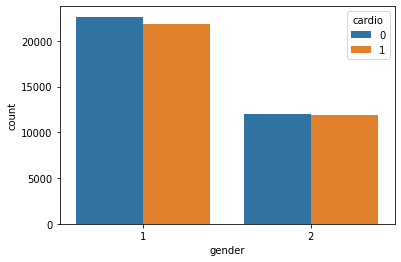

In [180]:
sns.countplot(data=data,x='gender',hue='cardio')

In [181]:
# data['rel'] =data['ap_lo']/data['ap_hi']
# sns.scatterplot(x='bmi',y='rel',data=data)

# Model

Delete the target label from the dataframe and store it separately:

In [256]:
X = data.drop(['active','alco','smoke','cardio','height','weight','pressure'],axis=1)
y = data['cardio'].copy()

In [195]:
X = data.drop(['active','alco','smoke','cardio','height','weight','pressure'],axis=1)

scalar=StandardScaler()
x_scaled=X.copy()

x_scaled[['age','ap_hi','ap_lo','bmi']]=scalar.fit_transform(x_scaled[['age','ap_hi','ap_lo','bmi']])
x_scaled=pd.DataFrame(x_scaled,columns=['age','gender','ap_hi','ap_lo','cholesterol','gluc','bmi'])
x_scaled

,age,gender,ap_hi,ap_lo,cholesterol,gluc,bmi
0,-0.433917,2,-1.001028,-0.137787,1,1,-1.073751
1,0.309515,1,0.804022,0.926250,3,1,1.496278
2,-0.245932,1,0.202339,-1.201824,3,1,-0.768239
3,-0.745875,2,1.405706,1.990287,1,1,0.263432
4,-0.806241,1,-1.602712,-2.265860,1,1,-0.866718
...,...,...,...,...,...,...,...
69994,0.652264,1,1.405706,-0.137787,1,1,0.397138
69995,-0.090763,2,-0.399345,-0.137787,1,1,-0.090139
69997,-0.161257,2,3.210756,0.926250,3,1,0.787548
69998,1.202039,1,0.503180,-0.137787,1,2,-0.056069


Split the data into a training set and a test set:

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [307]:
scaler=StandardScaler()
X_train_s=X_train.copy()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test

,age,gender,ap_hi,ap_lo,cholesterol,gluc,bmi
0,-0.507147,-0.729680,0.805183,-0.137760,0.936236,-0.394474,-0.929831
1,0.326767,-0.729680,0.805183,0.927111,-0.536890,-0.394474,-0.245179
2,-1.092669,1.370463,-0.398032,-0.137760,-0.536890,1.356054,-0.724270
3,0.368098,-0.729680,0.805183,0.927111,-0.536890,-0.394474,-0.194703
4,0.147261,1.370463,-0.398032,-0.137760,-0.536890,-0.394474,0.311663
...,...,...,...,...,...,...,...
6833,1.585336,1.370463,2.008398,3.056852,-0.536890,-0.394474,1.926347
6834,-1.689132,1.370463,-0.398032,-0.137760,-0.536890,-0.394474,0.674357
6835,0.312179,1.370463,-2.202854,-1.202630,-0.536890,1.356054,0.177970
6836,0.936196,-0.729680,0.203575,-0.137760,-0.536890,-0.394474,0.250594


Before the first model, we will test the dummy model. This model is supposed to give us a perspective on whether the real models we will create are really useful in forecasting or even the dummy gives such a forecast ...

In [308]:
dum=DummyClassifier(strategy='prior')
dum.fit(normalized_x_train,y_train)
dum_pre=dum.predict(normalized_x_test)
dum.score(normalized_x_test,y_test)

0.5048259725065809

Run on the 1-100 range and check the accuracy percentage of the KNN model given n which is the number of neighbors.

Text(0, 0.5, 'Testing Accuracy')

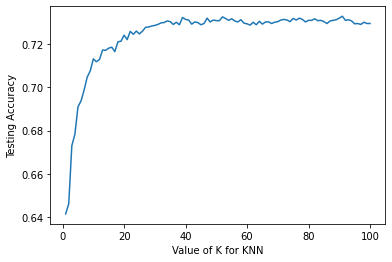

In [309]:
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(normalized_x_train, y_train)
    scores.append(knn.score(normalized_x_test,y_test))
#plot graph showing percentage of accuracy by number of neighbors
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


56 is the number of neighbors that brings the highest percentage of accuracy and therefore we will define the KNN model according to it.

In [320]:
knn = KNeighborsClassifier(n_neighbors=91)
knn.fit(normalized_x_train, y_train)
knn_pre=knn.predict(normalized_x_test)
knn.score(normalized_x_test,y_test)

0.7329628546358584

Text(24.0, 0.5, 'Actually')

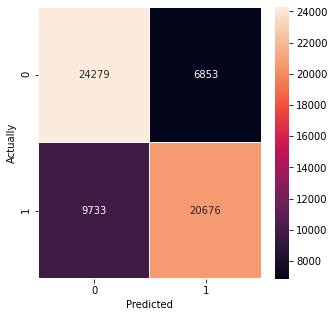

In [321]:
y_train_pred = cross_val_predict(knn, normalized_x_train, y_train, cv=5)
con=confusion_matrix(y_train, y_train_pred)

#plot confusion_matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

In [322]:
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:",recall_score(y_train, y_train_pred))
print("F1 score:",f1_score(y_train, y_train_pred))

Precision: 0.7510625158923318
Recall: 0.6799302837975599
F1 score: 0.7137284683627326


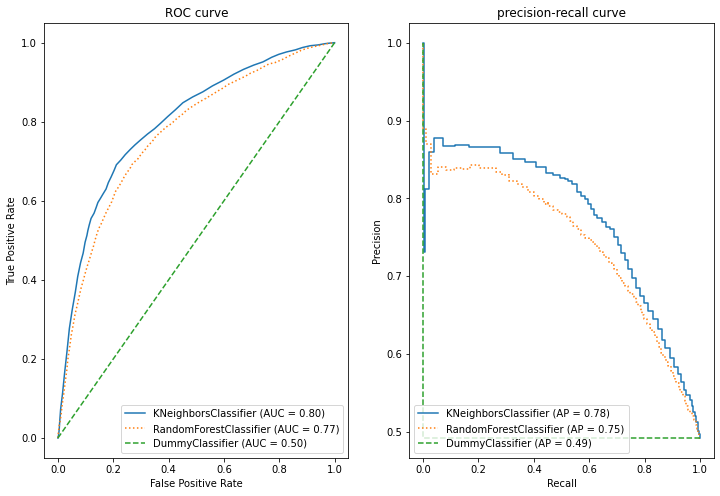

In [249]:
from sklearn.model_selection import cross_val_predict

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8),sharex=True)

plot_roc_curve(knn, X_test, y_test,ax=ax1)
plot_roc_curve(rf, X_test, y_test,ax=ax1,linestyle=':')
plot_roc_curve(dum, X_test, y_test,ax=ax1,linestyle='--')
plot_precision_recall_curve(knn, X_test, y_test,ax=ax2)
plot_precision_recall_curve(rf, X_test, y_test,ax=ax2,linestyle=':')
plot_precision_recall_curve(dum, X_test, y_test,ax=ax2,linestyle='--')
ax1.set_title('ROC curve')
ax2.set_title('precision-recall curve')
plt.show()

In [188]:
from sklearn.metrics import classification_report

print(classification_report(y_test,knn_pre))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      3432
           1       0.77      0.67      0.72      3406

    accuracy                           0.73      6838
   macro avg       0.74      0.73      0.73      6838
weighted avg       0.74      0.73      0.73      6838



In [189]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=100)
log.fit(X_train, y_train)
log.score(X_test,y_test)

0.7255045334893243

Text(24.0, 0.5, 'Actually')

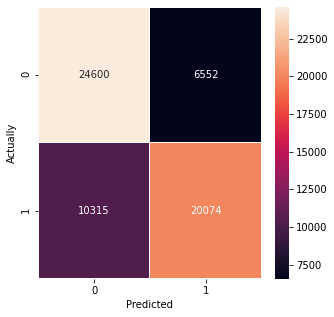

In [190]:


y_train_pred = cross_val_predict(log, X_train, y_train, cv=5)
con=confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

In [255]:
rf = RandomForestClassifier(n_estimators=72)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.7108803743784733

Text(0, 0.5, 'Testing Accuracy')

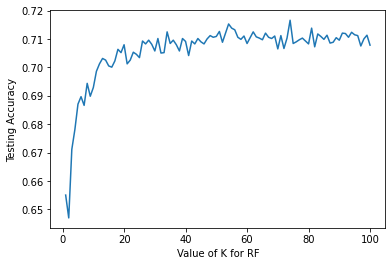

In [231]:
k_range = list(range(1, 101))
scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test,y_test))
#plot graph showing percentage of accuracy by number of neighbors
plt.plot(k_range, scores)
plt.xlabel('Value of K for RF')
plt.ylabel('Testing Accuracy')


In [238]:
scores

[0.655016086575022,
 0.6469727990640538,
 0.6711026615969582,
 0.6781222579701667,
 0.6870429950277859,
 0.6896753436677391,
 0.6866042702544604,
 0.6943550745832114,
 0.6898215852588476,
 0.6928926586721263,
 0.6985960807253583,
 0.7012284293653115,
 0.7031295700497221,
 0.7025446036852881,
 0.7004972214097689,
 0.7000584966364434,
 0.7022521205030711,
 0.7063468850541094,
 0.7051769523252412,
 0.707955542556303,
 0.7012284293653115,
 0.7025446036852881,
 0.7053231939163498,
 0.7045919859608073,
 0.7034220532319392,
 0.7092717168762797,
 0.7082480257385201,
 0.7095642000584966,
 0.7081017841474115,
 0.7057619186896753,
 0.7101491664229307,
 0.7050307107341328,
 0.7051769523252412,
 0.7124890318806668,
 0.7083942673296285,
 0.7095642000584966,
 0.707955542556303,
 0.7057619186896753,
 0.7101491664229307,
 0.7091254752851711,
 0.7041532611874817,
 0.7092717168762797,
 0.7082480257385201,
 0.7101491664229307,
 0.7089792336940626,
 0.7082480257385201,
 0.7100029248318221,
 0.7111728575606